# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [1]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [2]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    # pass  # ⬅️✏️
    
    c = []
    for a_val, b_val in zip(a,b):
        c_val = a_val*b_val
        c.append(c_val)
        
    return c

---

In [3]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [4]:
# Define a scalar: bias b
my_b = -5

In [7]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    # pass  # ⬅️✏️
    
    output = sum(mul(x,weights)) + bias
    return output

---

In [9]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b) # (0*(-10) + 1*10 + 1*5) + (-5) # (x*w) + b

10

In [10]:
# Import exp() function (safe on lists)
from numpy import exp

In [11]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    # pass  # ⬅️✏️
    # sigmoid function = https://en.wikipedia.org/wiki/Sigmoid_function
    
    output = 1/(1 + exp(-z))
    return output

---

In [12]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [13]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

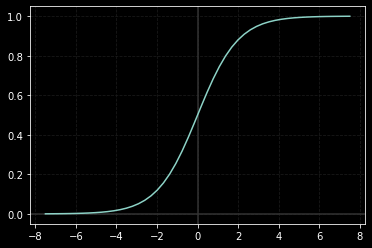

In [14]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [15]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    # pass  # ⬅️✏️
    
    output = sum(mul(x,weights)) + bias
    return output

---

In [16]:
# Test neuron() function
neuron(my_x, my_w, my_b)

10

In [26]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    # pass  # ⬅️✏️
    
    if x[0] or x[1]:
        return 1
    else:
        return 0


---

In [24]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [27]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


In [28]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    # pass  # ⬅️✏️
    
    return x[0] * x[1]

---

In [29]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.000
[1, 0] 0.000
[1, 1] 1.000


In [41]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    # pass  # ⬅️✏️
 
    return not x[0]

---

In [40]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 1.000
[1] 0.000


![X-OR](res/x-or_circuit.png)

In [50]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    # pass  # ⬅️✏️
    
    a = not x[0]
    b = not x[1]
    
    return (a * x[1] + x[0] * b)

---

In [51]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.000


![Half-adder](res/half-adder_circuit.png)

In [58]:
def half_adder(x):
    """
    """
    
    # Combine a XOR and an AND into a half-adder
    # ⬅️✏️
    
    # Calculating value of sum (exclusive or -> XOR)
    
    sum_ = xor_neuron(x)
    
    # Calculating value of carry
    
    carry = and_neuron(x)
    
    return sum_,carry

In [57]:
print('Checking half-adder neuron output')
for my_x in my_x_collection:
    print(my_x, half_adder(my_x))

Checking half-adder neuron output
[0, 0] (0, 0)
[0, 1] (1, 0)
[1, 0] (1, 0)
[1, 1] (0, 1)


---

![Adder](res/adder_circuit.png)

In [61]:
def full_adder(x,cin):
    """
    """
    
    # Combine two half-adders and an OR into a (full) adder
    # ⬅️✏️
    
    # difference between half-adder and full-adder: https://www.geeksforgeeks.org/difference-between-half-adder-and-full-adder/
        
    # Calculating value of sum (exclusive or -> XOR)
    
    sum_ = xor_neuron([xor_neuron(x),cin])
    
    # Calculating value of carry
    
    carry_aux = or_neuron([and_neuron([x[1],cin]),and_neuron([x[0],cin])])
    carry = or_neuron([and_neuron(x),carry_aux])
    
    return sum_,carry

In [62]:
# Combine two half-adders and an OR into a (full) adder
# ⬅️✏️

my_x_full_collection = [
    [0, 0],
    [0, 0],
    [0, 1],
    [0, 1],
    [1, 0],
    [1, 0],
    [1, 1],
    [1, 1],
]

my_cin_collection = [
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1
]

print('Checking full-adder neuron output')
for my_x,my_cin in zip(my_x_full_collection,my_cin_collection):
    print(my_x,my_cin, full_adder(my_x,my_cin))

Checking full-adder neuron output
[0, 0] 0 (0, 0)
[0, 0] 1 (1, 0)
[0, 1] 0 (1, 0)
[0, 1] 1 (0, 1)
[1, 0] 0 (1, 0)
[1, 0] 1 (0, 1)
[1, 1] 0 (0, 1)
[1, 1] 1 (1, 1)


---